In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('imputed_train_whole_file.csv');

In [3]:
df.head(5)

,Unnamed: 0,Capillary refill rate_max,Diastolic blood pressure_max,Fraction inspired oxygen_max,Glascow coma scale eye opening_max,Glascow coma scale motor response_max,Glascow coma scale total_max,Glascow coma scale verbal response_max,Glucose_max,Heart Rate_max,...,Height_skew,Mean blood pressure_skew,Oxygen saturation_skew,Respiratory rate_skew,Systolic blood pressure_skew,Temperature_skew,Weight_skew,pH_skew,len,y_true
0,0,0.315789,98.0,0.799898,4.0,6.0,13.571967,5.0,118.0,93.0,...,NaN,1.248351,-2.695965,0.607521,0.284682,-0.152913,0.654029,-1.060228,205,1
1,0,0.315789,79.0,0.799898,4.0,6.0,15.000000,5.0,144.0,113.0,...,NaN,0.010014,-1.361925,1.341741,0.523421,0.579741,0.654029,-1.060228,55,0
2,0,0.315789,117.0,0.799898,4.0,6.0,15.000000,5.0,153.0,130.0,...,NaN,-0.306575,-0.814388,0.593938,0.092369,1.041570,0.654029,-1.060228,71,0
3,0,0.315789,116.0,1.000000,4.0,6.0,13.571967,5.0,193.0,88.0,...,NaN,1.028908,-4.280045,1.305283,-0.021475,0.390250,0.654029,1.661999,132,0
4,0,0.315789,80.0,0.799898,4.0,6.0,13.571967,5.0,122.0,146.0,...,NaN,0.066830,0.755346,-0.870418,0.329575,1.221450,0.965172,-1.060228,82,0


In [5]:
df = df.drop(df.columns[0], axis=1);
df = df.drop(['Height_skew'],axis=1);
df.head()


KeyError: "['Height_skew'] not found in axis"

In [6]:
sum(df['y_true'] == 1)

1987

# Impute the values and normalization

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = df.drop(['y_true'],axis=1);
y = df['y_true'];
# Imputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)

X = imp_mean.transform(X)

# Normalization 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#X = np.array(imputer.transform(X), dtype=np.float32)

clf = LogisticRegression(random_state=0,max_iter=5000).fit(X, y)
# clf.predict(X[:2, :])

In [129]:
from sklearn.metrics import *

In [130]:
y_pred = clf.predict(X)

In [131]:
f1_score(y, y_pred)

0.30223880597014924

In [132]:
accuracy_score(y,y_pred)

0.8726244806212111

In [133]:
roc_auc_score(y,y_pred)

0.5905684887803494

# PCA

In [134]:
from sklearn import decomposition
accuracies = [];
num_dimensions = [];

for i in range(1,85,5):
    pca = decomposition.PCA(n_components=i)
    pca.fit(X)
    reduced_X = pca.transform(X);
    clf = LogisticRegression(random_state=0,max_iter=5000).fit(reduced_X, y);
    y_pred = clf.predict(reduced_X)
    accuracies.append(accuracy_score(y,y_pred));
    num_dimensions.append(i);

Text(0.5, 1.0, 'PCA dimension reduction and training accuracy')

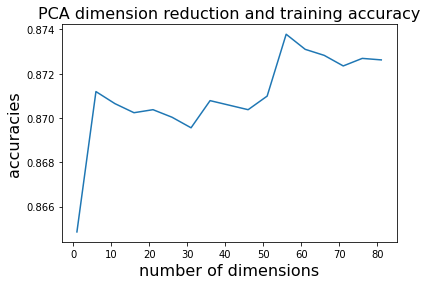

In [135]:
import matplotlib.pyplot as plt
plt.plot(num_dimensions,accuracies)
plt.ylabel('accuracies',fontsize=16);
plt.xlabel('number of dimensions',fontsize=16);
plt.title('PCA dimension reduction and training accuracy',fontsize=16)

In [136]:
f1_score(y, y_pred)

0.30223880597014924

In [137]:
accuracy_score(y,y_pred)

0.8726244806212111

In [138]:
roc_auc_score(y,y_pred)

0.5905684887803494

In [33]:
mean_cols = [col for col in df.columns if 'mean' in col]
print(list(mean_cols))

['Capillary refill rate_mean', 'Diastolic blood pressure_mean', 'Fraction inspired oxygen_mean', 'Glascow coma scale eye opening_mean', 'Glascow coma scale motor response_mean', 'Glascow coma scale total_mean', 'Glascow coma scale verbal response_mean', 'Glucose_mean', 'Heart Rate_mean', 'Height_mean', 'Mean blood pressure_mean', 'Oxygen saturation_mean', 'Respiratory rate_mean', 'Systolic blood pressure_mean', 'Temperature_mean', 'Weight_mean', 'pH_mean']


In [34]:
mean_cols.append('y_true');
mean_data_frame = df[mean_cols];

In [35]:
mean_data_frame

,Capillary refill rate_mean,Diastolic blood pressure_mean,Fraction inspired oxygen_mean,Glascow coma scale eye opening_mean,Glascow coma scale motor response_mean,Glascow coma scale total_mean,Glascow coma scale verbal response_mean,Glucose_mean,Heart Rate_mean,Height_mean,Mean blood pressure_mean,Oxygen saturation_mean,Respiratory rate_mean,Systolic blood pressure_mean,Temperature_mean,Weight_mean,pH_mean,y_true
0,0.198003,55.333333,0.547992,4.000000,6.000000,11.854811,5.000000,87.000000,76.231959,168.40587,66.533333,99.173684,19.634021,107.400000,36.555556,90.000000,5.000000,1
1,0.198003,60.938776,0.547992,3.200000,5.560000,11.680000,2.920000,98.888889,88.921569,168.40587,74.816331,97.588235,14.568627,102.571429,36.627792,82.659453,7.145159,0
2,0.198003,89.933333,0.547992,3.882353,6.000000,14.764706,4.882353,108.700000,102.916667,168.40587,104.388855,98.421053,19.233333,133.300000,36.113773,53.599998,5.000000,0
3,0.198003,56.373626,0.522222,3.636364,5.727273,11.854811,3.818182,129.552632,78.658537,168.00000,75.275862,97.566667,15.421687,127.252747,36.441620,74.730622,7.418462,0
4,0.198003,51.157895,0.547992,4.000000,6.000000,11.854811,5.000000,106.555556,90.581818,163.00000,67.947368,96.090909,20.690909,102.964912,36.725926,58.897079,7.145159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14676,0.198003,73.561404,0.547992,3.111111,6.000000,11.854811,4.851852,166.923077,74.310345,168.00000,87.107143,98.758621,16.465517,133.807018,36.092593,100.247560,7.145159,0
14677,0.198003,52.840000,0.547992,3.333333,5.083333,11.083333,2.666667,184.300000,65.560000,168.40587,70.446668,92.711864,18.385965,108.500000,36.740758,81.500000,7.295000,1
14678,0.198003,54.654545,0.547992,1.000000,1.000000,3.000000,1.000000,145.444444,64.363636,168.40587,81.551509,99.192982,14.034483,135.345455,36.333347,55.500000,7.323333,1
14679,0.198003,51.879310,0.400000,3.750000,4.750000,11.854811,1.000000,137.857143,102.956522,170.00000,66.526316,97.902778,19.662162,115.551724,36.544444,84.881136,6.500000,0


In [144]:
!pip install seaborn

     |████████████████████████████████| 285 kB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3 -m pip install --upgrade pip' command.


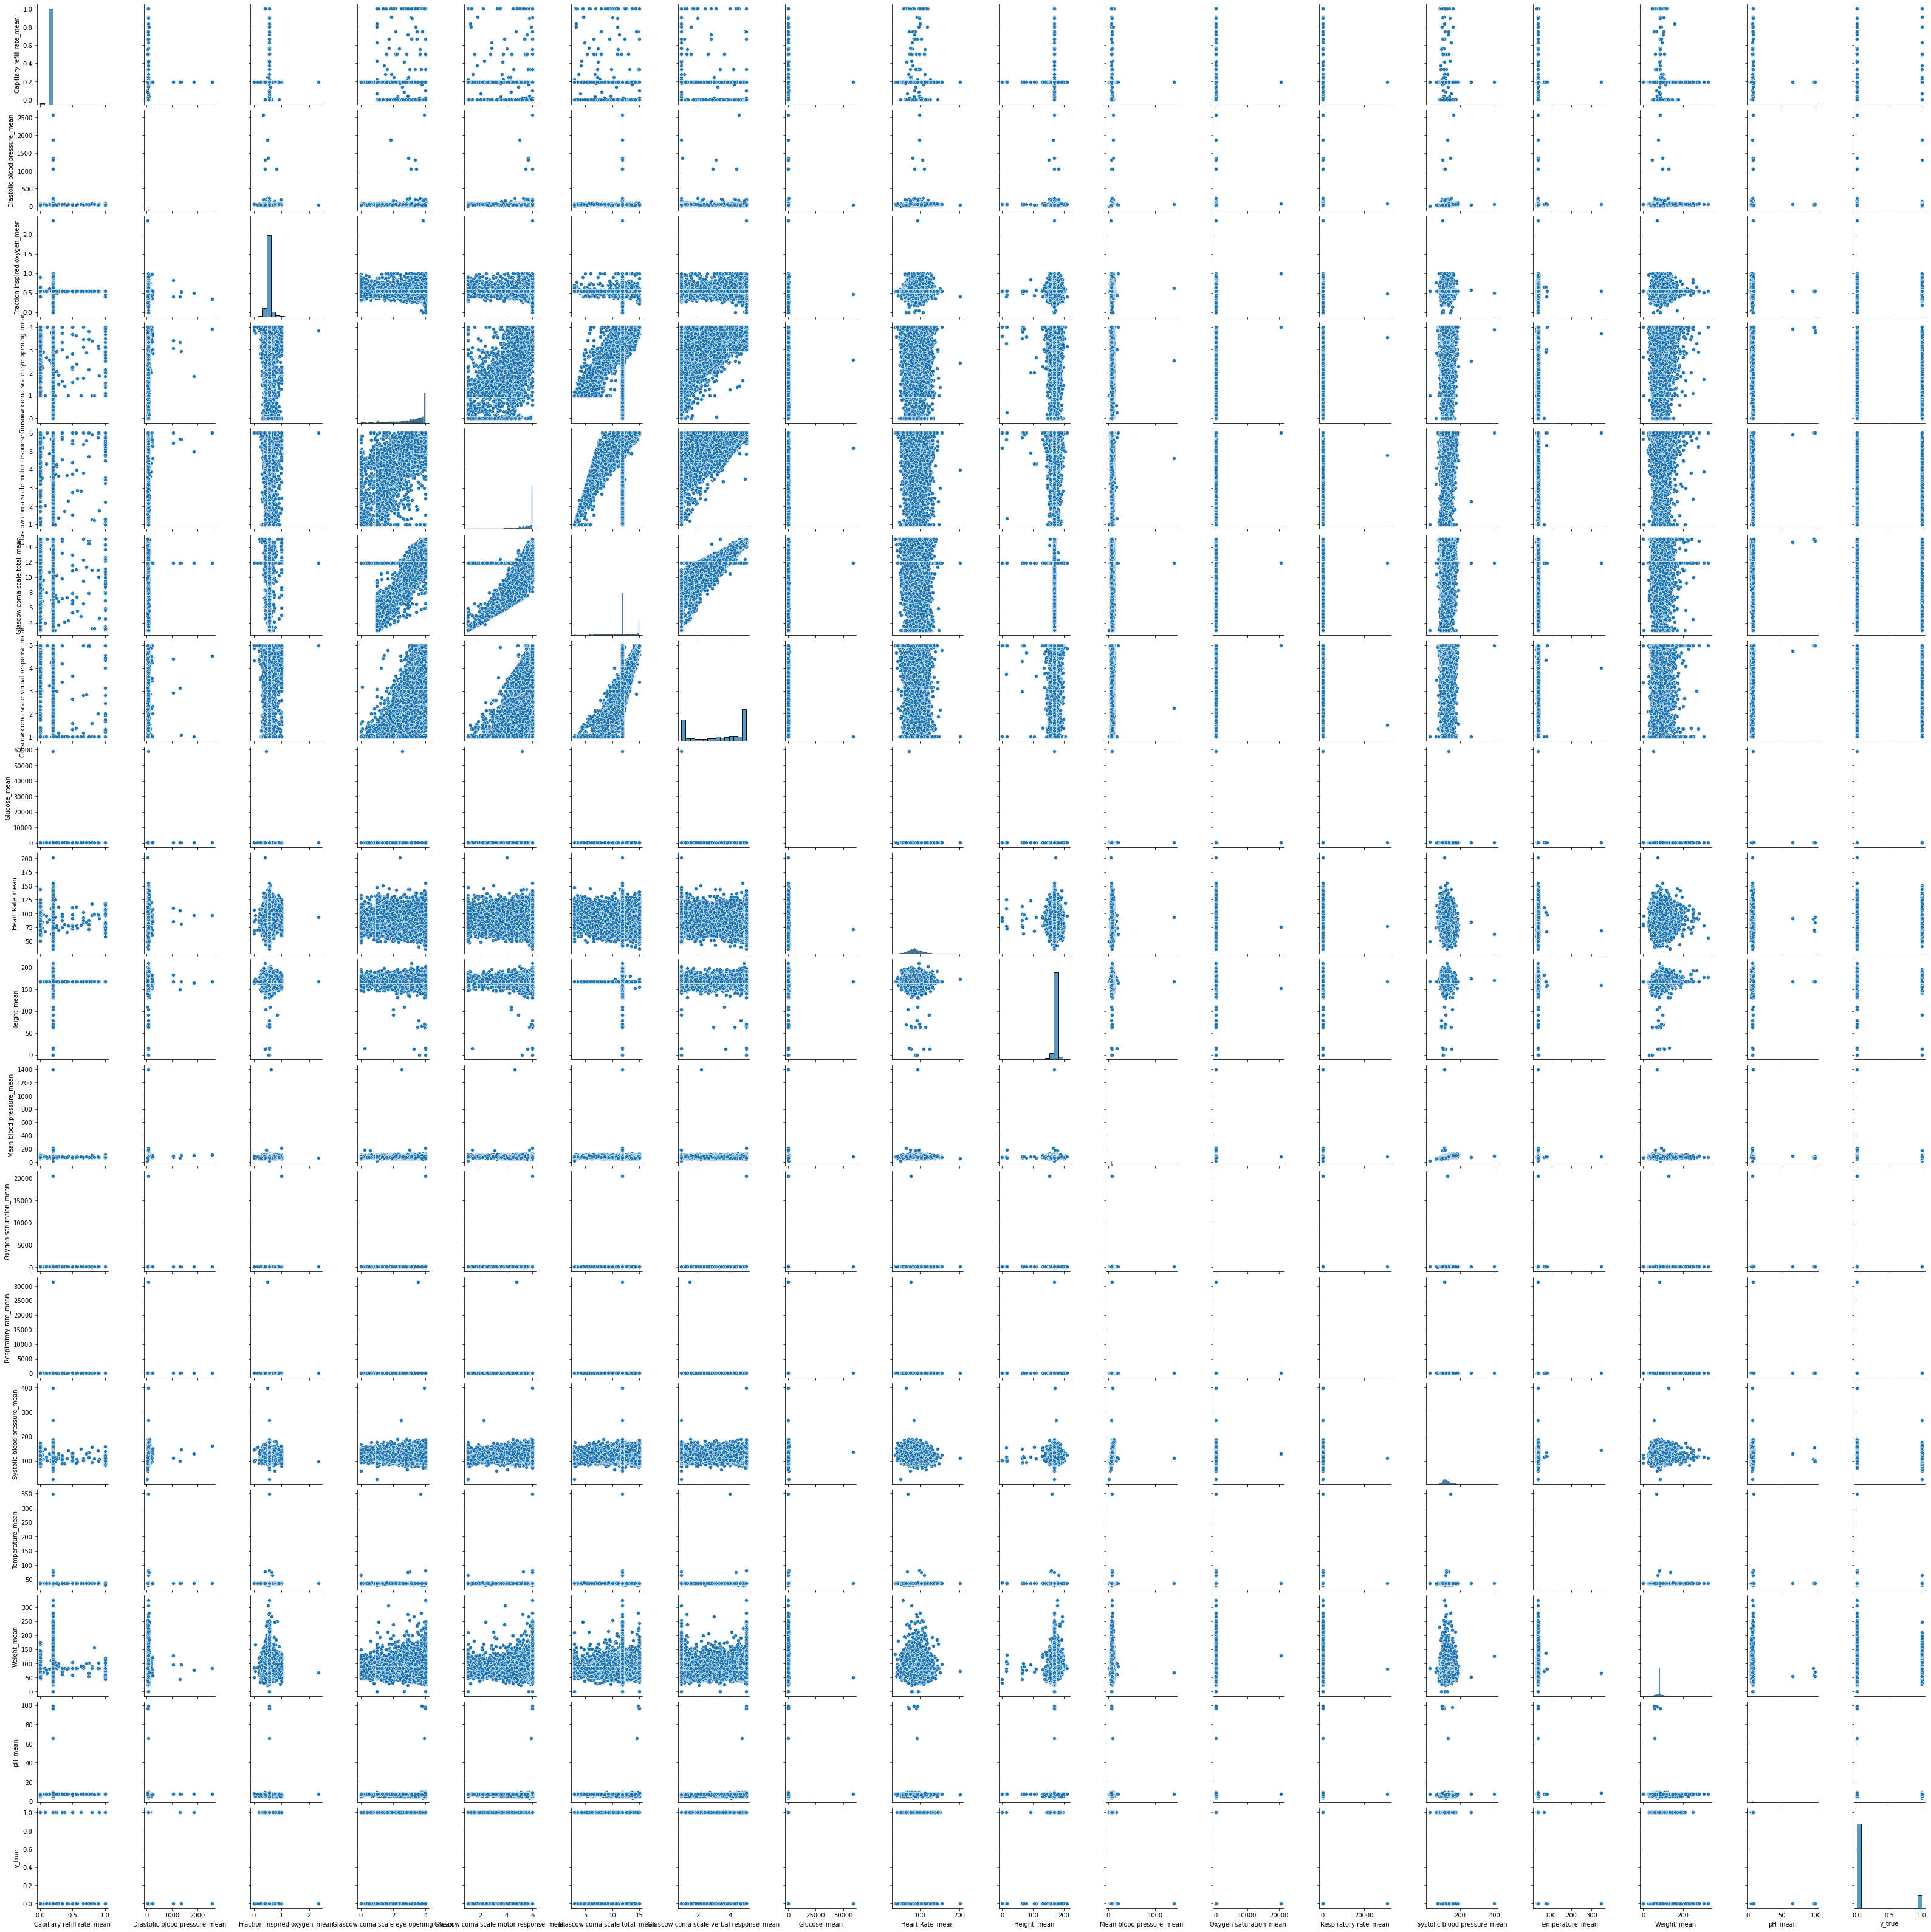

In [145]:
import seaborn as sns

sns.pairplot(mean_data_frame)

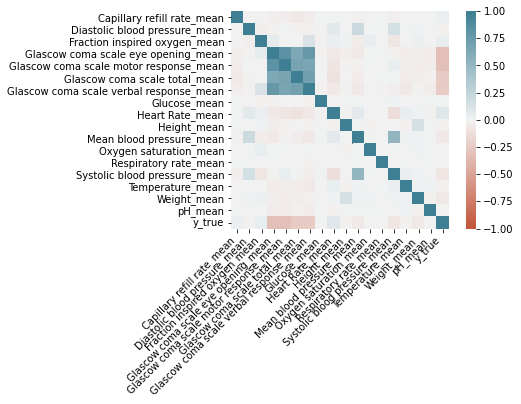

In [36]:
corr = mean_data_frame.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

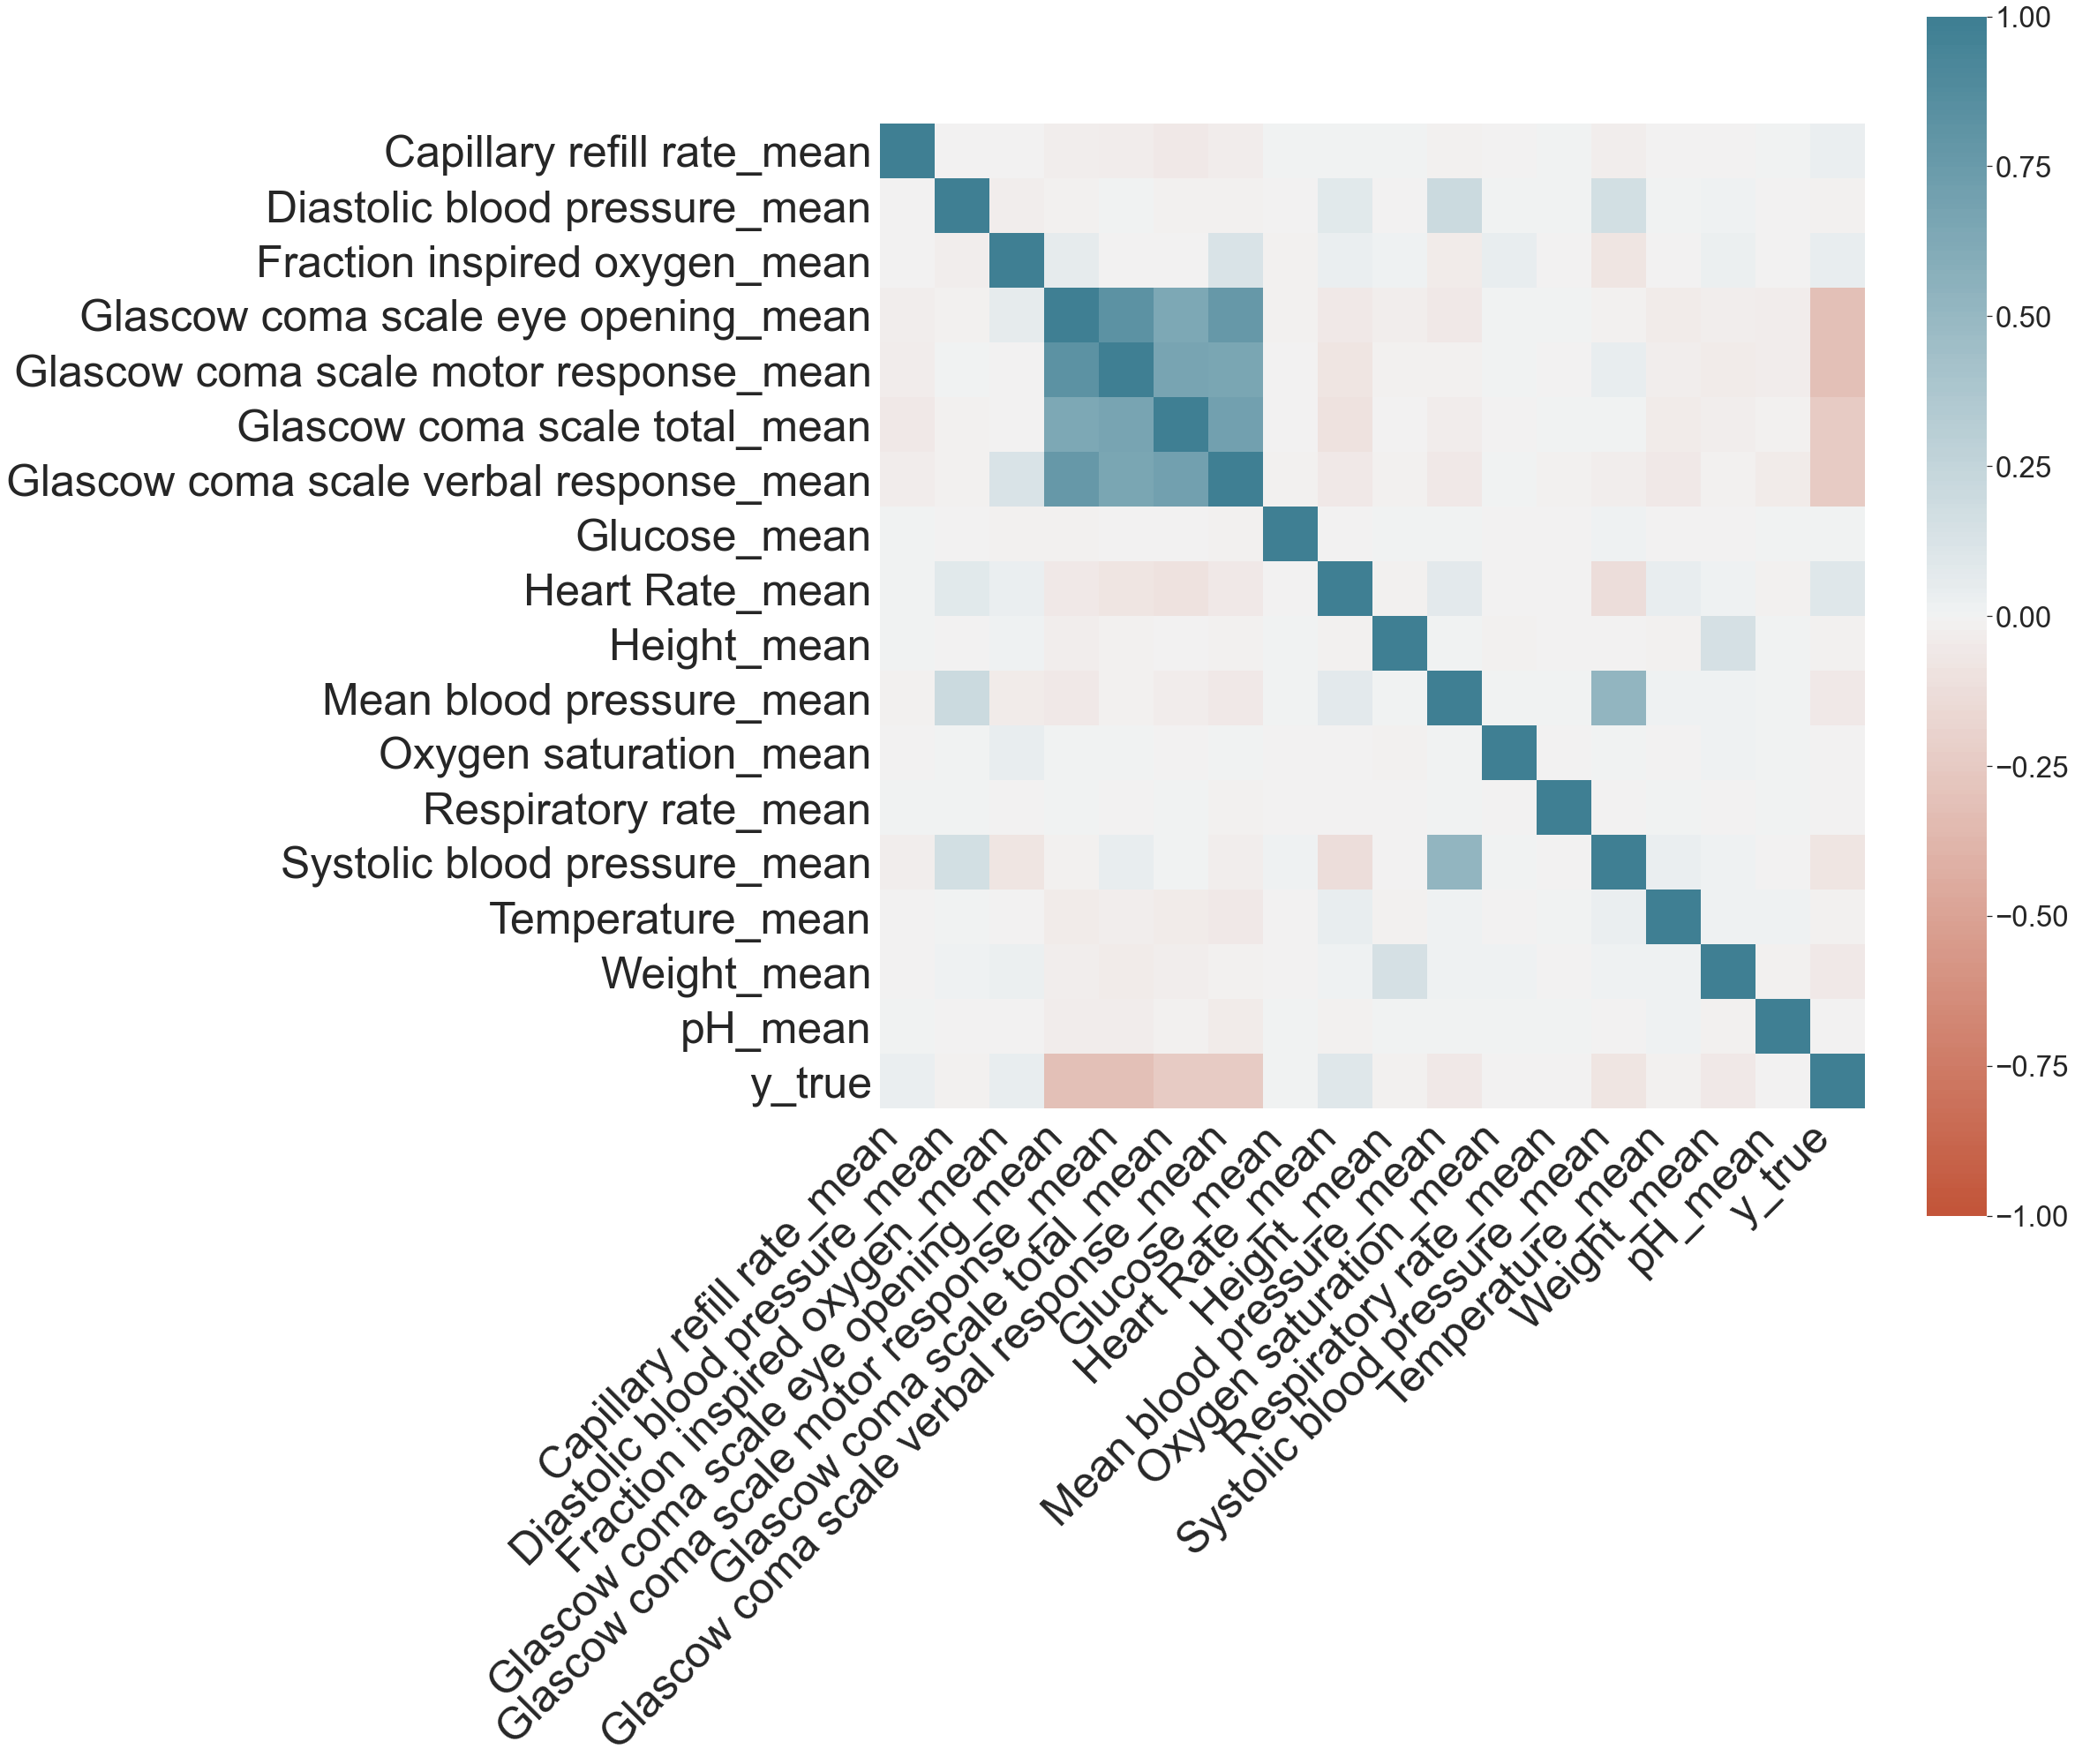

In [48]:
plt.figure(figsize=(25,25));
sns.set(font_scale=3)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.tick_params(axis = 'both',labelsize=50)
plt.savefig('correlation_plot.png');

In [44]:
ax?

In [177]:
sns.set_theme(style="whitegrid")
mean_data_frame[mean_data_frame.y_true == 1].shape[0]

1987

In [178]:
mean_data_frame[mean_data_frame.y_true == 1].shape[1]

18

In [9]:
sum(df['y_true'] == 0)

12694

In [10]:
df_to_plot = {'label':[0,1],'count':[12694,1987]}

In [11]:
df_to_plot = pd.DataFrame(df_to_plot)
df_to_plot

,label,count
0,0,12694
1,1,1987


Text(0.5, 1.0, 'bar plot for count of patient in-hospital deaths')

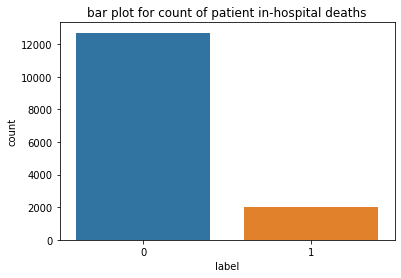

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot()
sns.barplot(x="label",y='count',data=df_to_plot)
plt.xlabel('label');
plt.ylabel('count')
plt.title('bar plot for count of patient in-hospital deaths')
plt.

In [20]:
1987/(1987+12694)


0.13534500374633882

<AxesSubplot:xlabel='Glascow coma scale total_mean', ylabel='Heart Rate_mean'>

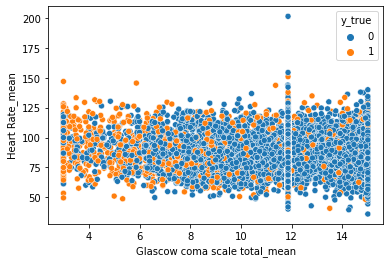

In [23]:
sns.scatterplot(data=df, x="Glascow coma scale total_mean", y="Heart Rate_mean", hue="y_true")

['Capillary refill rate_std', 'Diastolic blood pressure_std', 'Fraction inspired oxygen_std', 'Glascow coma scale eye opening_std', 'Glascow coma scale motor response_std', 'Glascow coma scale total_std', 'Glascow coma scale verbal response_std', 'Glucose_std', 'Heart Rate_std', 'Height_std', 'Mean blood pressure_std', 'Oxygen saturation_std', 'Respiratory rate_std', 'Systolic blood pressure_std', 'Temperature_std', 'Weight_std', 'pH_std']


array([<AxesSubplot:title={'center':'Mean blood pressure_std'}, xlabel='[y_true]'>,
       <AxesSubplot:title={'center':'Oxygen saturation_std'}, xlabel='[y_true]'>],
      dtype=object)

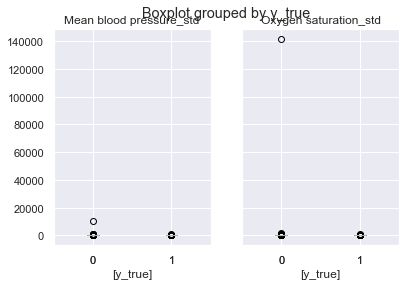

In [50]:
std_cols = [col for col in df.columns if 'std' in col]
print(list(std_cols))
std_cols.append('y_true')
sns.set(font_scale=1)
subset_df = df[['Mean blood pressure_std','Oxygen saturation_std','y_true']]
subset_df.boxplot(by='y_true')

array([<AxesSubplot:title={'center':'Mean blood pressure_std'}, xlabel='[y_true]'>,
       <AxesSubplot:title={'center':'Oxygen saturation_std'}, xlabel='[y_true]'>],
      dtype=object)

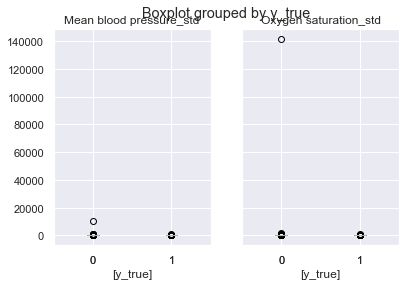

In [57]:
from scipy import stats
subset_df.drop(subset_df['Mean blood pressure_std'].idxmax())
subset_df.drop(subset_df['Oxygen saturation_std'].idxmax())
subset_df.boxplot(by='y_true')

In [58]:
mbp = subset_df['Mean blood pressure_std'];


In [60]:
mbp.to_numpy()

array([15.44051566,  7.91067815, 10.42324292, ..., 11.39095104,
       16.64450281,  6.23439773])

In [74]:
Q1 = mbp.quantile(0.25)
Q3 = mbp.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (mbp >= Q1 - 1.5 * IQR) & (mbp <= Q3 + 1.5 *IQR)
filtered_df = subset_df.loc[filter];
filtered_df

,Mean blood pressure_std,Oxygen saturation_std,y_true
0,15.440516,2.301677,1
1,7.910678,2.308042,0
2,10.423243,1.591802,0
3,16.748266,7.759083,0
4,7.677474,1.443667,0
...,...,...,...
14676,13.420037,1.760287,0
14677,7.755802,8.489448,1
14678,11.390951,1.726253,1
14679,16.644503,2.182902,0


In [76]:
o_sat = filtered_df['Oxygen saturation_std'];

Q1 = o_sat.quantile(0.25)
Q3 = o_sat.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (o_sat >= Q1 - 1.5 * IQR) & (o_sat <= Q3 + 1.5 *IQR)
filtered_df_o_sat = filtered_df.loc[filter];
filtered_df_o_sat

filtered_df_o_sat.shape

(12539, 3)

Text(0.5, 0.98, '')

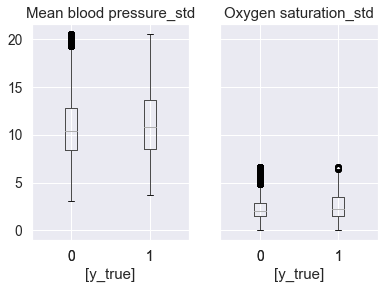

In [88]:
sns.set(font_scale=1.25)
ax = filtered_df_o_sat.boxplot(by='y_true')
plt.suptitle('')
ax[0].tick_params(axis = 'both',labelsize=15)
ax[1].tick_params(axis = 'both',labelsize=15)



array([<AxesSubplot:title={'center':'Mean blood pressure_std'}, xlabel='[y_true]'>,
       <AxesSubplot:title={'center':'Oxygen saturation_std'}, xlabel='[y_true]'>],
      dtype=object)